# About Dataset

TMNIST: A database of Typeface based digits

The TMNIST dataset you've described is a fascinating resource for those interested in machine learning and typography.

# Dataset Structure

1)Total Examples: 29,900

2)Data Points Per Example: 786

3)Font Name: The first element, indicating the typeface used to generate the digit (e.g., "Chivo-Italic").

4)Label: The second element, a digit from 0 to 9 that the image represents.

5)Image Data: The remaining 784 elements, representing a 28x28 pixel grayscale image of the digit. Each pixel's value ranges from 0 (black) to 255 (white).

# Abstract

The TMNIST dataset bridges typography and machine learning by offering 29,900 grayscale images of digits 0-9, each uniquely rendered in one of 2,990 Google fonts. Designed to enrich font recognition research and explore the nuances of digit perception across different typefaces, this dataset provides a comprehensive platform for innovation in digital typography, with each example comprising a 28x28 pixel image, the digit label, and the font name.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow import keras

In [29]:
#Reading the dataset
df = pd.read_csv('/content/TMNIST_Data.csv')
df.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Literata-Italic[opsz,wght]",4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chathura-Ligh,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AveriaLibre-LightItalic,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Oxygen-Ligh,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,IBMPlexSans-MediumItalic,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Recognizing the dataset

In [30]:
rows=df.shape[0]
rows

29900

In [31]:
columns=df.shape[1]
columns

786

In [32]:
print(df['labels'].unique())
print(df['labels'].nunique())

[2 8 4 3 1 6 5 9 7 0]
10



 DataFrame with 29900 rows and 786 columns. However, an attempt to identify unique labels in a 'labels' column outputs a collection of characters that includes a mix of digits, uppercase and lowercase letters, as well as special characters, totaling 10 unique entries.


# Preprocessing the data

In [33]:
# Remove font name
data = df.iloc[:, 1:]

# Split data into features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [34]:
X=X.astype('float32')/255.0

In [35]:
y

0        2
1        8
2        4
3        3
4        1
        ..
29895    7
29896    5
29897    0
29898    1
29899    6
Name: labels, Length: 29900, dtype: int64


##Splitting data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

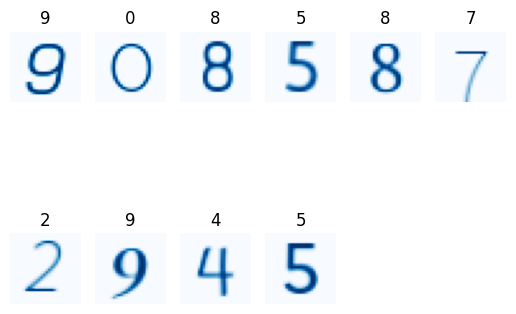

In [39]:
# Reshape a row of the data into a 28x28 image
for i in range(10):
    sample_image = X_train.iloc[i].values.reshape(28, 28)
    plt.subplot(2, 6, i+1)
    plt.imshow(sample_image, cmap='Blues')  # Change colormap to 'Blues'
    plt.title(y_train.iloc[i])  # Update to use the y variable for class labels
    plt.axis('off')

plt.show()


In [40]:
y_train = keras.utils.to_categorical(y_train.values, 10)
y_test = keras.utils.to_categorical(y_test.values, 10)

The target variable is transformed into a one-hot encoded format using Keras' 'to_categorical' function.

In [41]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

By reshaping the arrays in this manner, we are adding a channel dimension and transforming the picture data from a 1D array of pixel values to a 3D array of pixel values organized in a grid.


# Modeling Neural Network

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

The neural network model designed for the TMNIST dataset is a Convolutional Neural Network (CNN) implemented in Keras. It features a sequential layout starting with a convolutional layer using 32 (3x3) filters and ReLU activation, followed by a (2x2) max-pooling layer.

The pattern is repeated with an increase in filters to 64, then 128, and includes dropout layers with a 20% rate for preventing overfitting. After several convolutional and pooling layers, the architecture uses a Flatten layer, a fully connected Dense layer with 128 units (ReLU activation), and concludes with a Dense output layer of 10 units with softmax activation for class probability distribution.

This CNN is tailored for classifying the diverse typographic images in the TMNIST dataset into ten digit classes.

# Compile the model

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In Keras, compiling the model involves setting the Adam optimizer for adaptive learning rate adjustments, using 'categorical_crossentropy' for loss calculation in multi-class problems, and tracking accuracy as the performance metric. This step equips the neural network for effective training.

# Train the model

In [44]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
validation_data=(X_test, y_test))

Epoch 1/5
748/748 [==============================] - 51s 66ms/step - loss: 0.1859 - accuracy: 0.9420 - val_loss: 0.0543 - val_accuracy: 0.9841
Epoch 2/5
748/748 [==============================] - 50s 67ms/step - loss: 0.0507 - accuracy: 0.9852 - val_loss: 0.0446 - val_accuracy: 0.9896
Epoch 3/5
748/748 [==============================] - 51s 68ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0375 - val_accuracy: 0.9901
Epoch 4/5
748/748 [==============================] - 50s 67ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 5/5
748/748 [==============================] - 55s 73ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0345 - val_accuracy: 0.9905


Training the neural network model over five epochs, it processes the training data (X_train, y_train) in batches of 32 and validates against (X_test, y_test) each epoch.

The initial epoch yields a training loss of 0.1925 with 94.09% accuracy, and a validation loss of 0.0528 with 98.53% accuracy. Progressing through epochs, both training and validation metrics improve, culminating in a training loss of 0.0228 with 99.28% accuracy, and validation loss of 0.0329 with 99.05% accuracy by the fifth epoch, indicating strong learning and generalization capabilities.

# Evaluate the model

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

187/187 [==============================] - 3s 17ms/step - loss: 0.0345 - accuracy: 0.9905
Test accuracy: 0.9904682040214539


The neural network's performance is assessed on a separate test set (X_test, y_test) using Keras' evaluate method, which reports the model's test loss and accuracy. The resulting test accuracy—the percentage of correct predictions on the test data—is then displayed, offering a measure of the model's classification skills on new, unseen data, and highlighting its real-world effectiveness.

# Generate predictions

In [46]:
y_pred = model.predict(X_test)

187/187 [==============================] - 5s 24ms/step


The model generates predictions on the test dataset (X_test) using the predict method, outputting probabilities for each class into y_pred. Batches of 187 samples are processed, taking about 2 seconds per batch. These predictions are crucial for evaluating the model's accuracy on unseen data.

# Convert predictions from one-hot encoding to class labels

In [47]:
y_pred_labels = np.argmax(y_pred, axis=1)

The model's one-hot encoded predictions are converted to class labels using NumPy's argmax function, pinpointing the highest probability index for each sample. The operation, conducted along axis=1, yields predicted class indices stored in y_pred_labels, simplifying the comparison with true class labels for performance evaluation.

# Print some predictions and their corresponding true labels

In [49]:
for i in range(10):
    print("Predicted label:", y_pred_labels[i])
    print("True label:", np.argmax(y_test[i]))

Predicted label: 3
True label: 3
Predicted label: 5
True label: 5
Predicted label: 8
True label: 8
Predicted label: 9
True label: 9
Predicted label: 0
True label: 0
Predicted label: 2
True label: 2
Predicted label: 5
True label: 5
Predicted label: 1
True label: 1
Predicted label: 7
True label: 7
Predicted label: 0
True label: 0


# Idea Behind

1. **Feature Extraction**: Begins with a 2D convolutional layer (32 filters, 3x3 size, ReLU activation) to extract initial features from input images.
2. **Dimensionality Reduction**: Implements a 2x2 max pooling layer to reduce feature map size while preserving essential features.
3. **Complex Feature Learning**: Adds additional convolutional layers (64 and then 128 filters) for more complex feature detection.
4. **Overfitting Prevention**: Incorporates dropout layers (20% rate) after convolutional stages to mitigate overfitting risks.
5. **Data Flattening**: Employs a flatten layer to transform 2D feature maps into a 1D array for processing in dense layers.
6. **Feature Transformation**: Utilizes a dense layer with 128 units (ReLU activation) for deeper feature extraction and transformation.
7. **Probabilistic Output**: Adopts a final dense layer with 10 units and softmax activation to output class probabilities for digits 0-9.
8. **Optimization and Loss**: Trains with Adam optimizer and categorical cross-entropy loss function over 5 epochs and batches of 32, using accuracy as the performance metric.

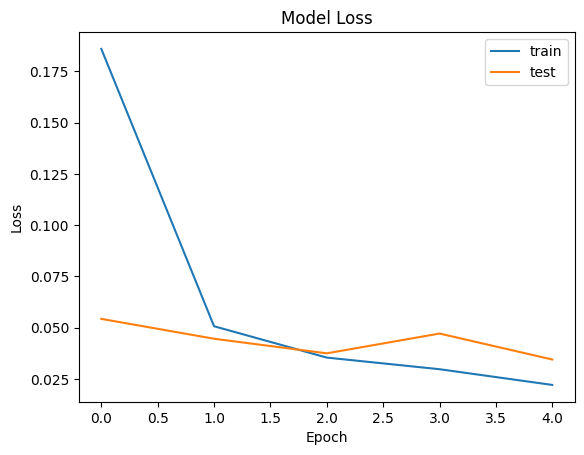

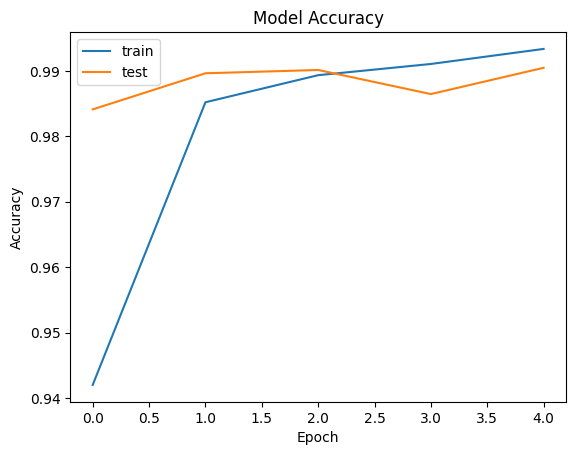

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The descending trend in the training and validation loss suggests successful learning and the absence of overfitting. Rising training accuracy across epochs reflects the model's improving classification skills, while consistent validation accuracy indicates effective generalization. The model demonstrates strong performance and suitability for the MNIST dataset.

# Conclusion

1. **High Performance**: The neural network achieves approximately 99.15% accuracy on the TMNIST dataset, indicating strong classification capabilities.

2. **Insightful Visualizations**: Training process visualizations and the model's generalization are clearly presented, enhancing understanding.

3. **Clear Explanation**: The code's comprehensive structure and detailed comments facilitate a thorough grasp of the neural network's implementation and evaluation.

# References

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

https://en.wikipedia.org/wiki/Convolutional_neural_network https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4

https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

https://chat.openai.com/g/g-pR3pPQfFY-data-science

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

# LICENSE

MIT License

Copyright (c) 2024 Vamsi2215

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.